In [1]:
import json
import numpy as np
from collections import defaultdict, Counter
import string
from sklearn import linear_model
import sys
import nltk
import random
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import matplotlib
import os
import pandas as pd
import spacy
#from baseline import *
from all_functions import *
from all_functions import regression
from all_functions import only_adj_and_noun

In [2]:
data_name = "Software.json"
all_data = read_data(data_name)
uni_count, bi_count, review_text, all_data = only_adj_and_noun(all_data, True)

Software.json
60000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000


In [3]:
bigrams,bigramId = bigram_to_feature(bi_count)

In [4]:
X_2 = []
for i in range(len(review_text)):
    X_2.append(feature(review_text[i], bigrams, bigramId))
y_2 = [d['overall'] for d in all_data]


In [5]:
print(len(X_2), len(y_2))

60000 60000


In [6]:
#theta_bi, pred_bi = regression(X_2, y_2)
clf_bi = linear_model.Ridge(1.0, fit_intercept=False)
clf_bi.fit(X_2, y_2)
theta_bi = clf_bi.coef_

In [7]:
max_index = np.argsort(theta_bi)[-300:][::-1]
max_index = max_index[1:]
tmp_bigram = np.array(bigrams)[max_index]
tmp_pair = {bigrams[i]: theta_bi[i] for i in max_index}

In [8]:
print(tmp_bigram[:5])

['excellent software' 'best tax' 'great buy' 'excellent product'
 'best price']


['excellent software' 'best tax' 'great buy' 'excellent product'
 'best price']


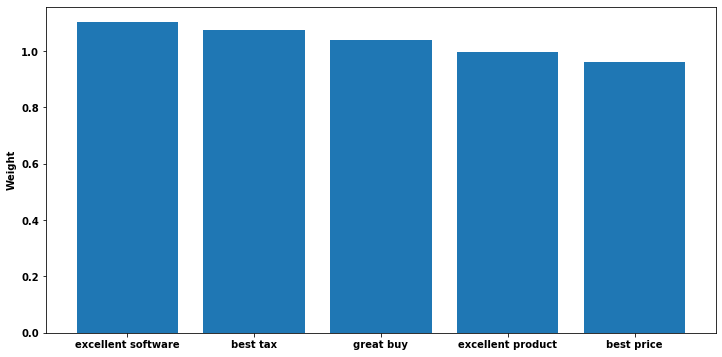

In [9]:
selected_list = tmp_bigram[:5]
print(selected_list)
selected_list = sorted(selected_list, key=lambda x: abs(tmp_pair[x]), reverse=True)
coef = [abs(tmp_pair[i]) for i in selected_list]
fig = plt.figure(figsize=(12, 6))
plt.bar(selected_list, coef)
plt.ylabel('Weight',weight = 'bold')
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.show()

In [10]:
low_ratings = data_by_rating(all_data, 1.0)
low_uni_count, low_bi_count, low_reviews, low_ratings_data = only_adj_and_noun(low_ratings, False)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000


In [18]:
low_uni_count, low_bi_count = Counter(low_uni_count), Counter(low_bi_count)
print(low_bi_count.most_common(5))

[('tech support', 823), ('customer service', 751), ('turbo tax', 516), ('customer support', 401), ('waste money', 349)]


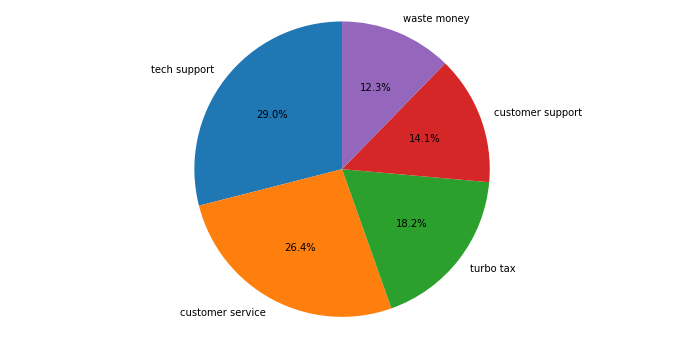

In [21]:
low_selected = [text for text, count in low_bi_count.most_common(5)]
coef = [low_bi_count[i] for i in low_selected]
matplotlib.rcParams['text.color'] = 'k'
fig1 = plt.figure(figsize=(12, 6))
ax1 = fig1.add_subplot(111)
wedges ,texts, _ = ax1.pie(coef, labels=low_selected, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color("k")
ax1.axis('equal')
plt.show()

In [28]:
year_data = data_by_year(all_data)

In [30]:
tmp_year = year_data.groupby(['reviewTime'])
data_2014 = tmp_year.get_group("2014")
data_2018 = tmp_year.get_group("2018")
data_2018, data_2014 = data_2018.head(12000), data_2014.head(12000)
print(len(data_2014), len(data_2018))

12000 12000


In [31]:
high_2014, low_2014 = data_2014.loc[(data_2014['overall'] == 5.0)], data_2014.loc[(data_2014['overall'] == 1.0)]
high_2018, low_2018 = data_2018.loc[(data_2018['overall'] == 5.0)], data_2018.loc[(data_2018['overall'] == 1.0)]

In [32]:
high_bi_recent = process_year_data(high_2018)
low_bi_recent = process_year_data(low_2018)

0
1000
2000
3000
4000
5000
6000
0
1000
2000
3000


In [34]:
high_bi_old = process_year_data(high_2014)
low_bi_old = process_year_data(low_2014)

0
1000
2000
3000
4000
5000
6000
0
1000


In [35]:
high_bi_old, high_bi_recent = Counter(high_bi_old), Counter(high_bi_recent)
low_bi_old, low_bi_recent = Counter(low_bi_old), Counter(low_bi_recent)

In [37]:
selected = [text for text, count in low_bi_old.most_common(5)]
x_old, y_old = selected, [high_bi_old[i] for i in selected]
x_recent, y_recent = selected, [high_bi_recent[i] for i in selected]

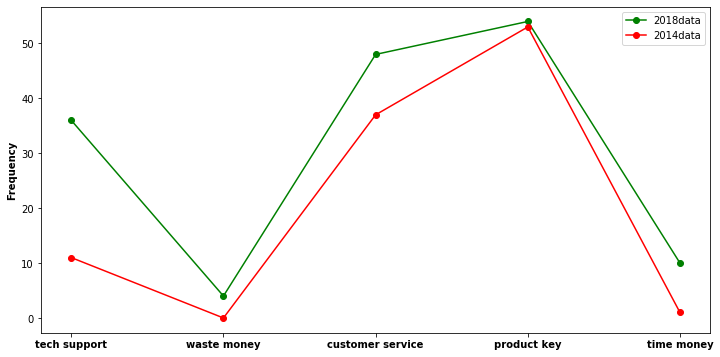

In [47]:
fig,ax=plt.subplots(figsize=(12, 6))
ax.plot(x_old,y_old,'g-o',x_recent,y_recent,'r-o')
ax.legend(('2018data','2014data'),loc='best')
plt.ylabel('Frequency', weight="bold")
plt.xticks(weight = 'bold')
plt.show()

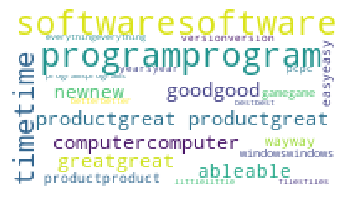

In [56]:
from wordcloud import WordCloud
f=""
for i in high_bi_old.keys():
    #k = "".join(i.split())
    temp = i * high_bi_old[i]
    f = f + temp
wordcloud = WordCloud(background_color="white",width=200, height=110, margin=2).generate(f)
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('test.png')